# Download dataset from Weights & Biases
Use this notebook to download the synthetic dataset (321 MB).

Depending on your connection, it might take about 5 minutes to finish. This will only
happen once, even if it is run multiple times.


In [27]:
import wandb

run = wandb.init()


In [28]:
artifact = run.use_artifact(
    "warm-kanelbullar/FiberDiameter/rendered-fibers-medium:v0", type="dataset"
)
artifact_dir = artifact.download()


wandb: Downloading large artifact rendered-fibers-medium:v0, 321.79MB. 7680 files... Done. 0:0:0.5


In [29]:
# The dataset is now stored here
print(artifact_dir)


./artifacts/rendered-fibers-medium:v0


The dataset has one image (png), one segmentation (npz) and one params (json) file per each render.

Each render has the split and id in the name for example the render `train0001` is the
first one of the `train` split.

`train0001_params` contains one key per label of the segmentation.
Fibers start at the number 100 and have the information of the initial and final
positions of the fiber and the relative (to the image size) diameter of it.

Image (png)


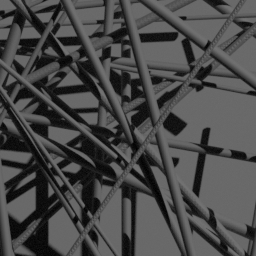

Segmentation (npz)


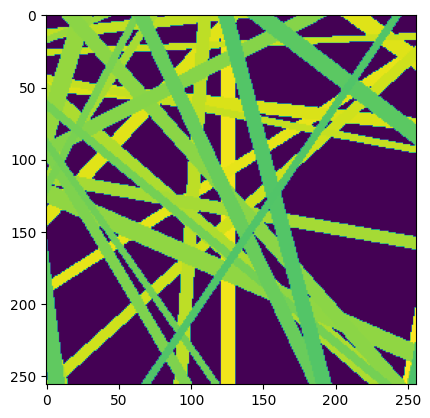

params
{'0': {'name': 'bg'},
 '100': {'d': 0.02777752214034311,
         'name': 'fiber00',
         'p1': [0.4758825208315395, -0.6, 0.08611123892982844],
         'p2': [0.6, 0.13547732985394745, 0.08611123892982844]},
 '101': {'d': 0.02216614460999389,
         'name': 'fiber01',
         'p1': [-0.29904399585050473, -0.6, 0.0750281666248315],
         'p2': [0.5193306038862087, 0.6, 0.0750281666248315]},
 '102': {'d': 0.0415575235716283,
         'name': 'fiber02',
         'p1': [0.2778249021251188, -0.6, 0.05424940483901735],
         'p2': [-0.04151941229829692, 0.6, 0.05424940483901735]},
 '103': {'d': 0.024656509969924578,
         'name': 'fiber03',
         'p1': [-0.5093212172765086, 0.6, 0.04192114985405506],
         'p2': [-0.6, 0.26882799380313444, 0.04192114985405506]},
 '104': {'d': 0.04668591573395863,
         'name': 'fiber04',
         'p1': [0.6, 0.09738117598447782, 0.018578191987075745],
         'p2': [-0.05870732507206711, 0.6, 0.018578191987075745]},
 '105':

In [30]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from pprint import pprint


def open_image(task_id):
    return Image.open(os.path.join(artifact_dir, f"{task_id}.png"))


def open_segmentation(task_id):
    seg = np.load(os.path.join(artifact_dir, f"{task_id}_seg.npz"))["y"]
    return seg


def open_params(task_id):
    with open(os.path.join(artifact_dir, f"{task_id}_params")) as f:
        params = json.load(f)
    return params


# show a task
task_id = "train0002"
print("Image (png)")
display(open_image(task_id))

print("Segmentation (npz)")
plt.imshow(open_segmentation(task_id))
plt.show()

print("params")
pprint(open_params(task_id))
